# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** Kacper Jasinski

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


Wnioski do zad 1.
W pierwszym zadaniu implementujemy funkcję chebyshev_nodes(), która generuje węzły Czebyszewa drugiego rodzaju. Na początku funkcja sprawdza, czy argument n jest liczbą całkowitą oraz czy jest większy od zera. Jeśli warunek ten nie jest spełniony, zwracane jest None, aby zabezpieczyć się przed niepoprawnymi danymi wejściowymi. W przypadku gdy n jest równe 1, funkcja zwraca jednowymiarową tablicę z wartością 1.0, co wynika ze wzoru na węzły Czebyszewa dla pojedynczego węzła punkt ten przyjmuje wartość cos(0)=1. Gdy n jest większe od 1, tworzona jest tablica o rozmiarze n, którą wypełniamy wartościami obliczonymi ze wzoru cos(kπ/n-1) dla kolejnych wartości  k=0,1,...,n−1. Po obliczeniu wszystkich węzłów tablica jest sortowana malejąco, tak aby wynik był uporządkowany od największej do najmniejszej wartości, co ułatwia dalsze obliczenia numeryczne.

---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [46]:
# ===== Twoja implementacja tutaj =====
f1 = lambda x: np.sign(x) * x + x ** 2
f2 = lambda x: np.sign(x) * (x ** 2)
f3 = lambda x: (abs(np.sin(5 * x))) ** 3
f4_1 = lambda x: 1 / (1 + 1 * (x ** 2))
f4_25 = lambda x: 1 / (1 + 25 * (x ** 2))
f4_100 = lambda x: 1 / (1 + 100 * (x ** 2))
f5 = lambda x: np.sign(x)

Wnioski do zad 2.
W drugim zadaniu, korzystając z wyrażeń lambda, zdefiniowaliśmy zestaw siedmiu funkcji, które będą wykorzystywane w kolejnych częściach laboratorium. Funkcje te reprezentują różne klasy regularności: od funkcji ciągłych, poprzez funkcje różniczkowalne w różnym stopniu, aż po funkcję nieciągłą. Dzięki zastosowaniu lambd możemy w prosty sposób definiować krótkie funkcje anonimowe bez konieczności pisania pełnych deklaracji def.

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


Wnioski do zad 3.
W trzecim zadaniu implementujemy funkcję obliczającą normę wektorową, która służy do oceny jakości interpolacji. Norma ta mierzy maksymalny błąd pomiędzy wartościami dokładnej funkcji a wartościami jej interpolantu. Im bliżej zera jest wynik normy, tym lepsze jest dopasowanie interpolacji do funkcji. W implementacji obliczamy różnicę między odpowiadającymi sobie elementami obu wektorów, następnie bierzemy wartości bezwzględne tych różnic i zwracamy największą z nich, czyli maksymalny błąd.

---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


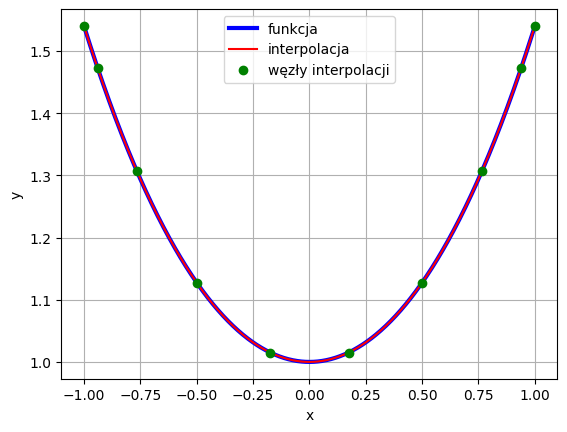

In [ ]:
from scipy.interpolate import barycentric_interpolate
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)
# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

For n = 1.0 Norm = 0.1101122777849829


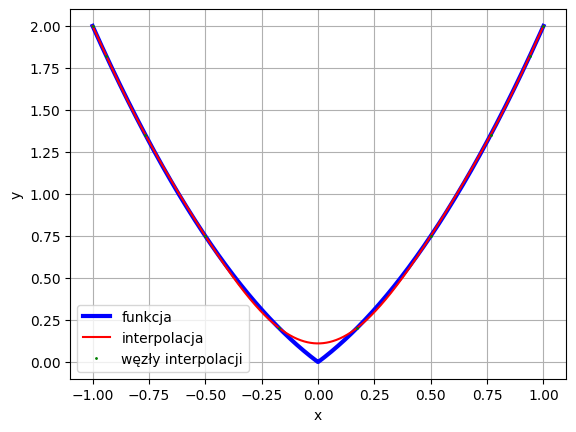

For n = 2.0 Norm = 0.009124053856609131


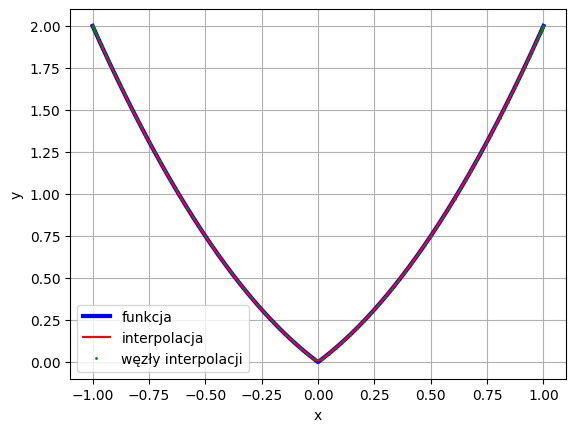

For n = 3.0 Norm = 0.00023808283885493205


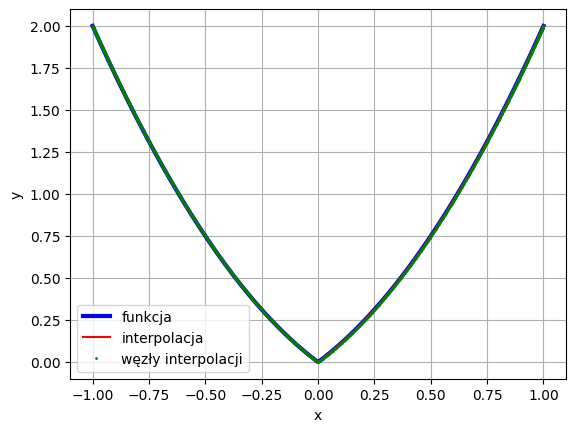

For n = 4.0 Norm = 1.8533453683871118e-06


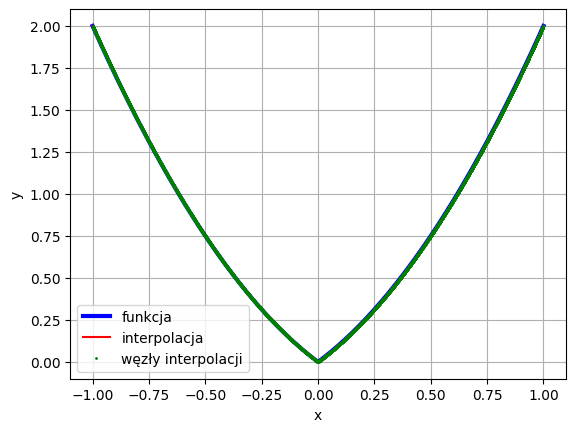

For n = 5.0 Norm = 2.2337217607266285e-09


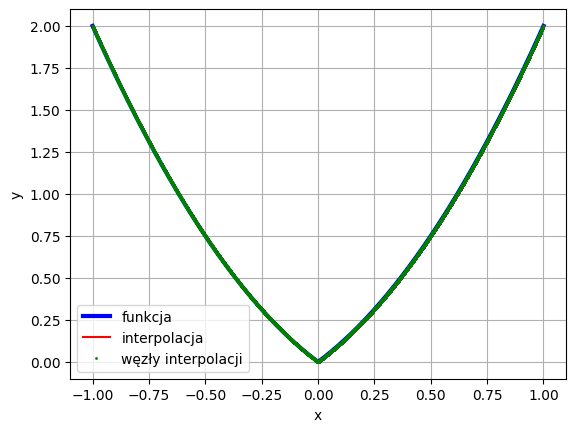

In [ ]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)
n = np.linspace(1, 5, 5)


for i in n:
    xch = main.chebyshev_nodes(int(10 ** i))
    yimp = sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    print(f"For n = {i} Norm = {main.L_inf(f1(x), yimp)}")
    plt.plot(x, f1(x), 'b', linewidth=3, label=r'funkcja')
    plt.plot(x, yimp, 'r', label='interpolacja')
    plt.plot(xch, f1(xch), 'go', label='węzły interpolacji', markersize=1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.grid()
    plt.show()


Wnioski do zad 4.
W pierwszym podpunkcie implementujemy funkcję barycentric_inte(), która realizuje interpolację metodą barycentryczną zgodnie z wzorem. Metoda barycentryczna jest jedną z najstabilniejszych numerycznie form interpolacji wielomianowej. W drugim podpunkcie, dla funkcji Zadania 2, wykonujemy interpolację w węzłach Czebyszewa.Interpolację przeprowadzamy dla różnych rzędów, czyli dla różnej liczby węzłów. Można zauważyć, że zwiększanie liczby węzłów powoduje zmniejszanie normy, co oznacza poprawę dokładności interpolacji wartości coraz lepiej odwzorowują funkcję pierwotną. Jednocześnie jednak czas obliczeń rośnie, ponieważ wyższy rząd interpolacji wymaga większej liczby operacji i dłuższego wyliczania wartości barycentrycznych. Metoda barycentryczna pozostaje jednak wydajna i stabilna nawet dla bardzo dużych wartości n.

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

For n = 1.0 Norm = 0.0053045866081226495
For n = 2.0 Norm = 4.557426970365258e-05
For n = 3.0 Norm = 4.4743396447302736e-07
For n = 4.0 Norm = 1.855200910811825e-09
For n = 1.0 Norm = 0.566200521323618
For n = 2.0 Norm = 0.00033440016167090496
For n = 3.0 Norm = 1.381723100226462e-07
For n = 4.0 Norm = 2.5108999852325328e-11


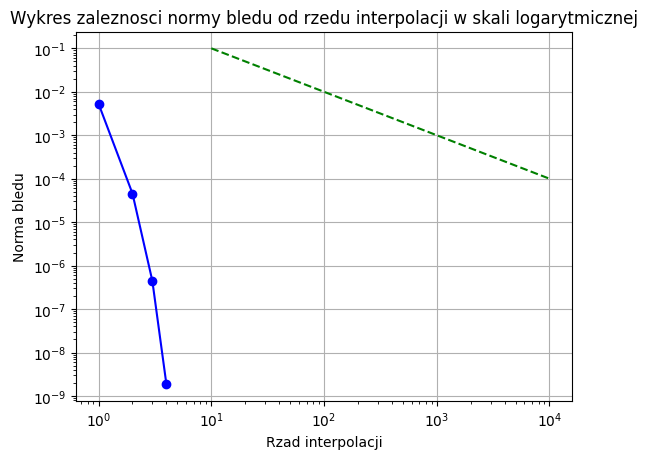

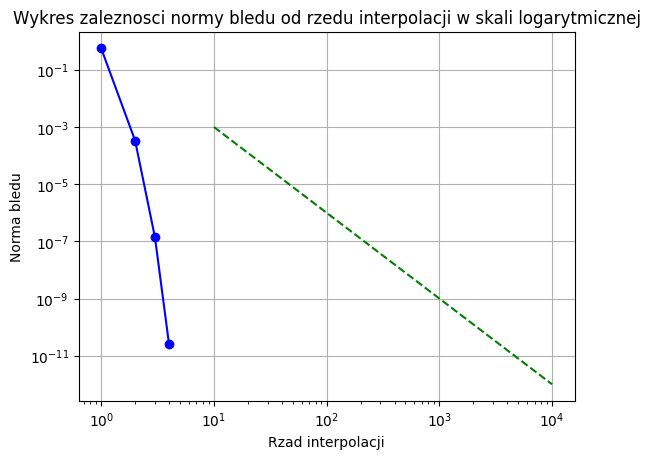

In [93]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)
n = np.linspace(1, 4, 4)

# === f2 ===
norm = []
rank = [1, 2, 3, 4]

for i in n:
    xch = main.chebyshev_nodes(int(10 ** i))
    yimp = sp.interpolate.barycentric_interpolate(xch, f2(xch), x)
    error = main.L_inf(f2(x), yimp)
    print(f"For n = {i} Norm = {error}")
    norm.append(error)

plt.loglog(rank, norm, 'bo-')
plt.xlabel("Rzad interpolacji")
plt.ylabel("Norma bledu")
plt.title("Wykres zaleznosci normy bledu od rzedu interpolacji w skali logarytmicznej")
plt.grid(True)

v = 1

N = [10**i for i in rank]

theory = [N_i**(-v) for N_i in N]
plt.loglog(N, theory, 'g--', label="n^{-1}")

# === f3 ===
norm = []
rank = [1, 2, 3, 4]

for i in n:
    xch = main.chebyshev_nodes(int(10 ** i))
    yimp = sp.interpolate.barycentric_interpolate(xch, f3(xch), x)
    error = main.L_inf(f3(x), yimp)
    print(f"For n = {i} Norm = {error}")
    norm.append(error)
plt.figure()
plt.loglog(rank, norm, 'bo-')
plt.xlabel("Rzad interpolacji")
plt.ylabel("Norma bledu")
plt.title("Wykres zaleznosci normy bledu od rzedu interpolacji w skali logarytmicznej")
plt.grid(True)

v = 3

N = [10**i for i in rank]

theory = [N_i**(-v) for N_i in N]
plt.loglog(N, theory, 'g--', label="n^{-3}")

Wnioski do zad 5.
W Zadaniu 5 przeanalizowano jakość interpolacji barycentrycznej dla funkcji jednokrotnie i trzykrotnie różniczkowalnych. Obliczono normę błędu pomiędzy wartościami funkcji a wartościami wielomianu interpolacyjnego w punktach równomiernie rozmieszczonych w przedziale [−1,1]. Dla funkcji f2, która jest jednokrotnie różniczkowalna, norma błędu maleje. Dla funkcji f3, trzykrotnie różniczkowalnej, obserwuje się spadek błędu szybszy niz w f2.

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

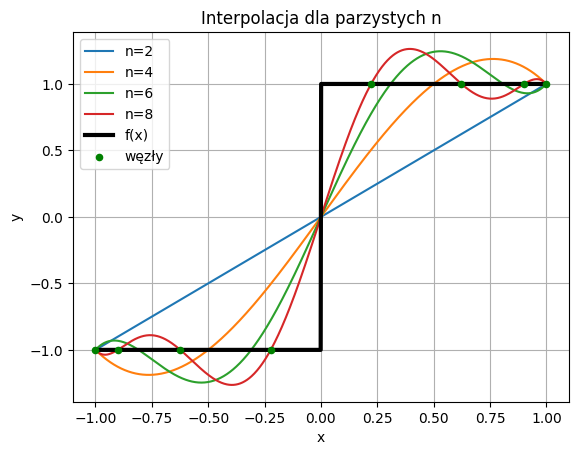

c:\Users\pando\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\interpolate\_polyint.py:728: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
c:\Users\pando\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\interpolate\_polyint.py:735: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


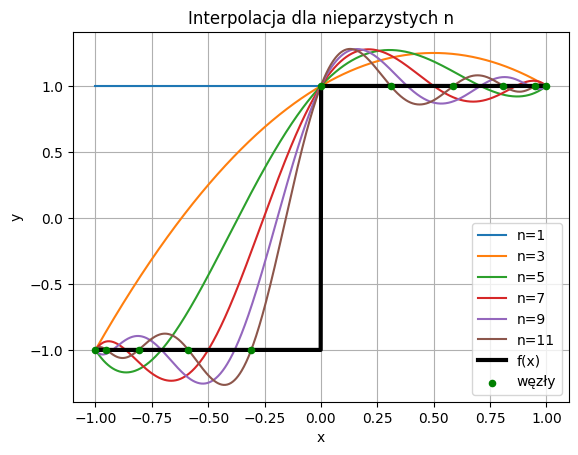

In [76]:
# ===== Twoja implementacja tutaj =====
# f5 = lambda x: np.sign(x)

x = np.linspace(-1, 1, 1000)
fx = f5(x)

n = np.linspace(1, 11, 10, dtype=int)

even_n = [i for i in n if i % 2 == 0]
odd_n = [i for i in n if i % 2 != 0]

min_error_even = float('inf')
plt.figure()
for i in even_n:
    xch = main.chebyshev_nodes(int(i))
    yimp = sp.interpolate.barycentric_interpolate(xch, f5(xch), x)
    error = main.L_inf(f5(x), yimp)
    if error < min_error_even:
        min_error_even = error
    plt.plot(x, yimp, label=f'n={i}')
plt.plot(x, fx, 'k', linewidth=3, label='f(x)')
plt.scatter(xch, f5(xch), color='g', s=20, zorder=5, label='węzły')
plt.title(f'Interpolacja dla parzystych n')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

min_error_odd = float('inf')
plt.figure()
for i in odd_n:
    xch = main.chebyshev_nodes(int(i))
    yimp = sp.interpolate.barycentric_interpolate(xch, f5(xch), x)
    error = main.L_inf(f5(x), yimp)
    if error < min_error_odd:
        min_error_odd = error
    plt.plot(x, yimp, label=f'n={i}')
plt.plot(x, fx, 'k', linewidth=3, label='f(x)')
plt.scatter(xch, f5(xch), color='g', s=20, zorder=5, label='węzły')
plt.title(f'Interpolacja dla nieparzystych n')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Wnioski do zad 6.
W Zadaniu 6 zbadano efekt Gibbsa dla funkcji nieciągłej f(x)=sign(x) przy interpolacji barycentrycznej w węzłach Czebyszewa. Analizując wykresy dla parzystych i nieparzystych liczb węzłów można zauważyć istotną różnicę w zachowaniu interpolacji w pobliżu punktu nieciągłości x=0. Dla parzystych n wszystkie krzywe interpolacyjne przechodzą przez punkt (0,0), czyli dokładnie w środku skoku funkcji, a następnie oscylują w kierunku wartości 1. Natomiast dla nieparzystych n wszystkie krzywe przechodzą przez punkt (0,1), czyli już po skoku funkcji, i dalej oscylują wokół wartości 1. Minimalny błąd interpolacji jest w obu przypadkach niezależny od rzędu, jednak różnice wynikają z tego, jak węzły Czebyszewa rozmieszczają punkt nieciągłości względem interpolanta.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)